# **1. Perkenalan Dataset**


Dataset ini berasal dari Kaggle dan berisi informasi tentang individu dengan berbagai atribut yang berkaitan dengan faktor pribadi dan gaya hidup mereka, dirancang untuk analisis di bidang kesehatan. Fitur-fitur dalam dataset mencakup nama, usia, status pernikahan, tingkat pendidikan, jumlah anak, status merokok, tingkat aktivitas fisik, status pekerjaan, pendapatan, konsumsi alkohol, kebiasaan makan, pola tidur, serta riwayat penyakit mental, penyalahgunaan zat, dan kondisi medis kronis.

link dataset : https://www.kaggle.com/datasets/anthonytherrien/depression-dataset

# **2. Import Library**

In [566]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# **3. Memuat Dataset**

In [567]:
data = pd.read_csv("/content/Dataset_Clustering.csv")
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


# **4. Exploratory Data Analysis (EDA)**


In [568]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Marital Status                10000 non-null  object 
 3   Education Level               10000 non-null  object 
 4   Number of Children            10000 non-null  int64  
 5   Smoking Status                10000 non-null  object 
 6   Physical Activity Level       10000 non-null  object 
 7   Employment Status             10000 non-null  object 
 8   Income                        10000 non-null  float64
 9   Alcohol Consumption           10000 non-null  object 
 10  Dietary Habits                10000 non-null  object 
 11  Sleep Patterns                10000 non-null  object 
 12  History of Mental Illness     10000 non-null  object 
 13  Hi

In [569]:
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [570]:
data.describe()

,Age,Number of Children,Income
count,10000.00000,10000.000000,10000.000000
mean,49.10490,1.295600,50940.812668
std,18.13041,1.231573,40684.422154
min,18.00000,0.000000,2.970000
25%,33.00000,0.000000,21368.612500
50%,49.00000,1.000000,37993.995000
75%,65.00000,2.000000,77264.357500
max,80.00000,4.000000,209894.250000


In [571]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Name, Age, Marital Status, Education Level, Number of Children, Smoking Status, Physical Activity Level, Employment Status, Income, Alcohol Consumption, Dietary Habits, Sleep Patterns, History of Mental Illness, History of Substance Abuse, Family History of Depression, Chronic Medical Conditions]
Index: []


Dapat delihat data cukup bersih tidak terdapat missing value dan data duplicates, yang menandakan data bersih.

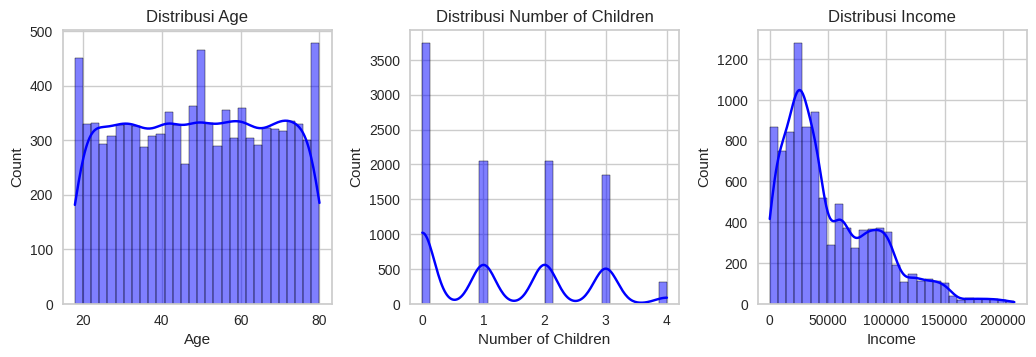

In [572]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

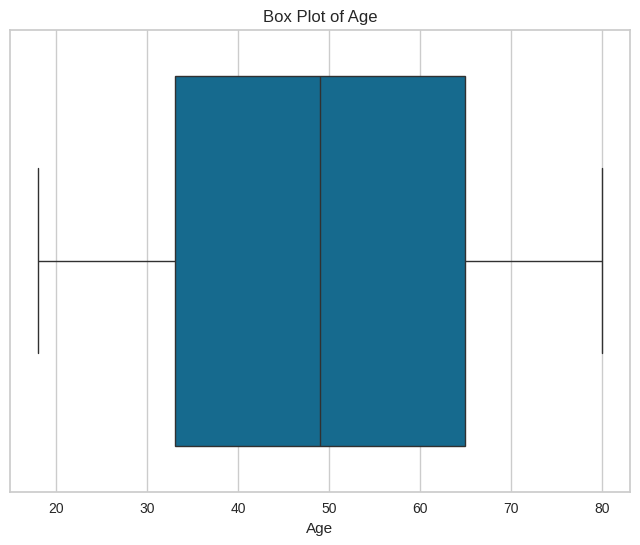

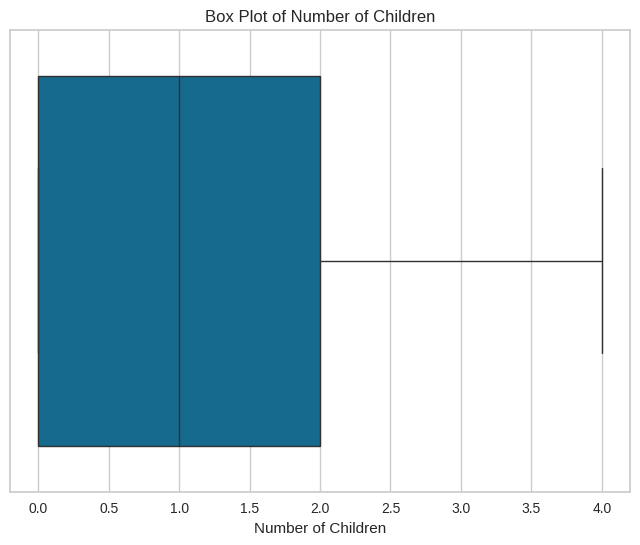

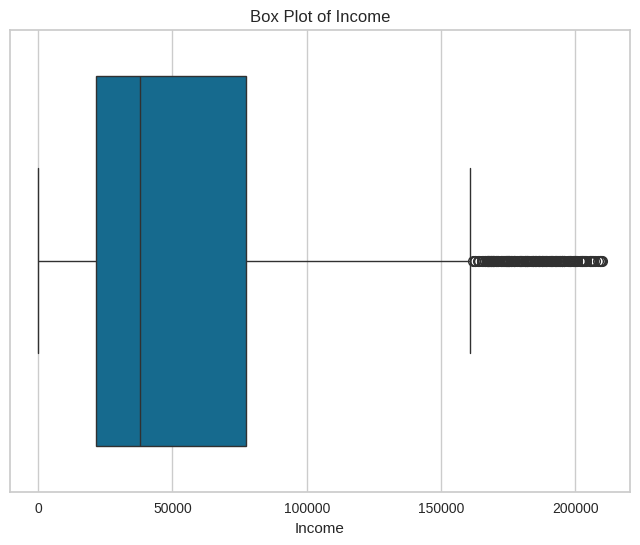

In [573]:
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Terdapat Outlier pada kolom Income

<ipython-input-574-b2bf6cc3cd7c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
<ipython-input-574-b2bf6cc3cd7c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
<ipython-input-574-b2bf6cc3cd7c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
<ipython-input-574-b2bf6cc3cd7c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=

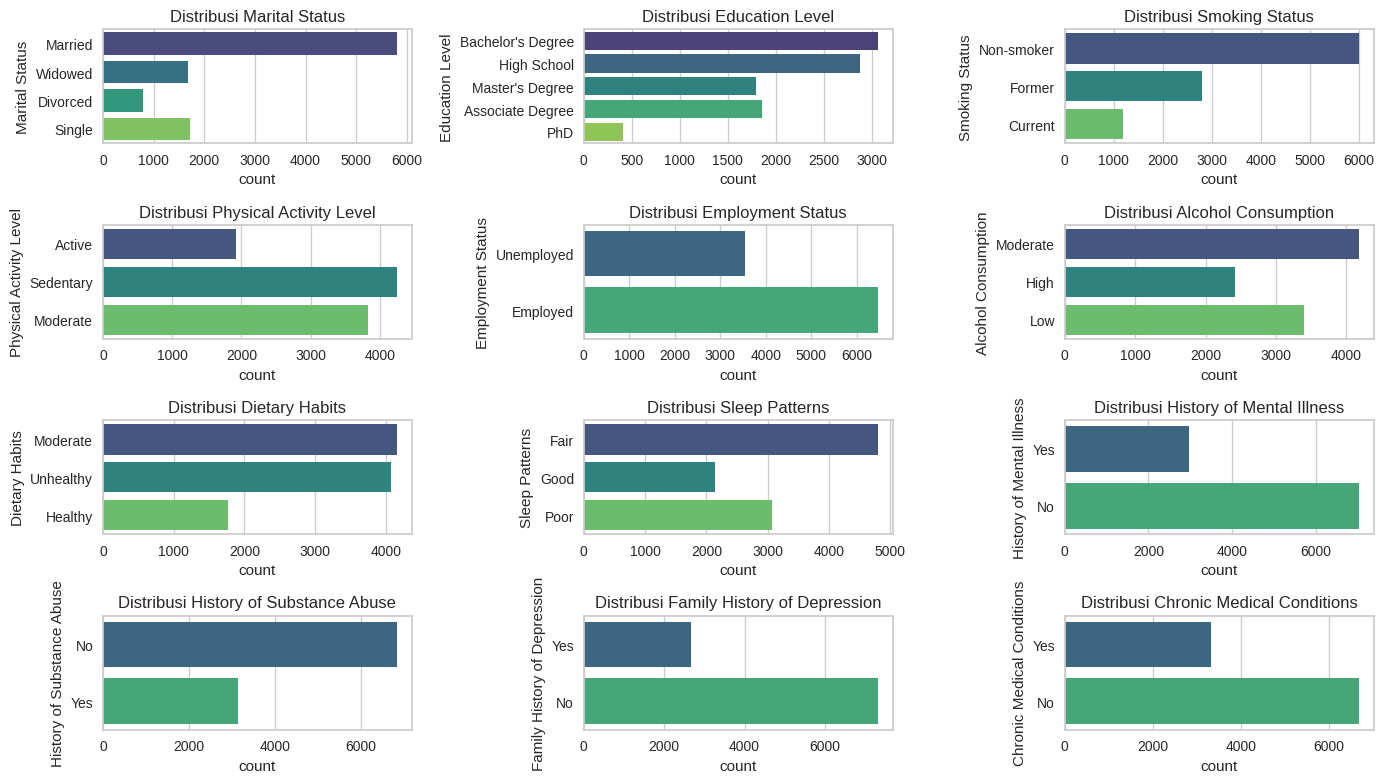

In [574]:
cat_features = data.select_dtypes(include=[object]).drop(columns=['Name'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=data[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

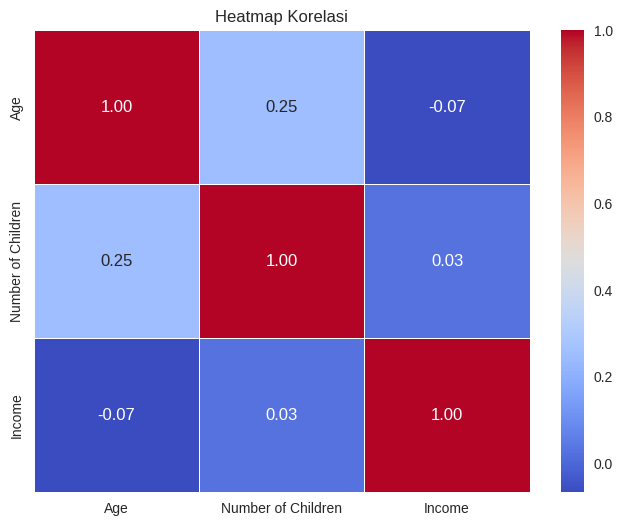

In [575]:
plt.figure(figsize=(8, 6))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

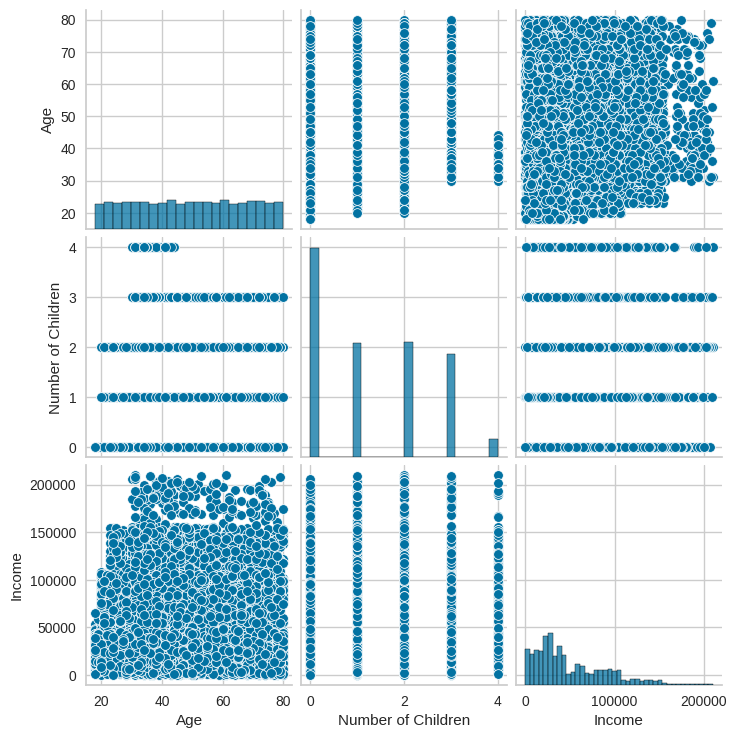

In [576]:
sns.pairplot(num_features)
plt.show()

# **5. Data Preprocessing**

In [577]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier berdasarkan IQR
df_cleaned = data[(data['Income'] >= (Q1 - 1.5 * IQR)) & (data['Income'] <= (Q3 + 1.5 * IQR))]

Menghapud Outlier pada kolom Income

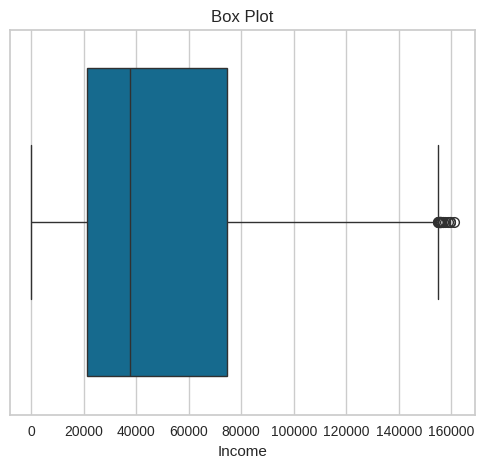

In [578]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df_cleaned['Income'])
plt.title(f'Box Plot')
plt.show()

In [579]:
df_cleaned.describe()

,Age,Number of Children,Income
count,9854.000000,9854.000000,9854.000000
mean,49.057845,1.290745,48960.812654
std,18.168547,1.230883,37533.153486
min,18.000000,0.000000,2.970000
25%,33.000000,0.000000,21097.212500
50%,49.000000,1.000000,37478.245000
75%,65.000000,2.000000,74616.067500
max,80.000000,4.000000,160962.940000


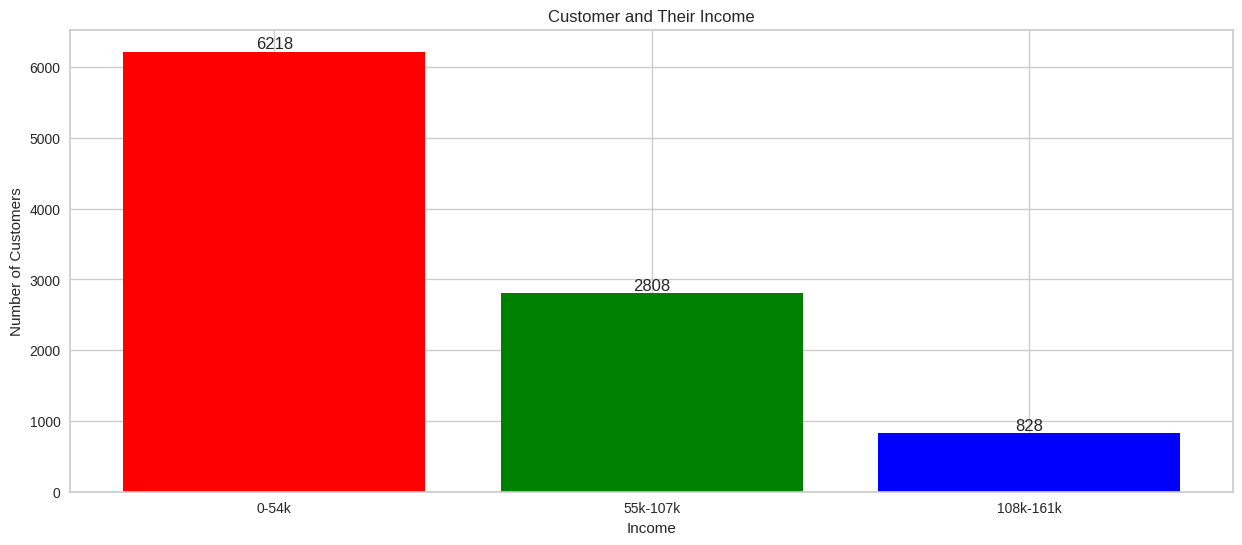

In [580]:
i0_54 = df_cleaned["Income"][(df_cleaned["Income"] >= 0) & (df_cleaned["Income"] <= 54000)]
i54_107 = df_cleaned["Income"][(df_cleaned["Income"] >= 54000.1) & (df_cleaned["Income"] <= 107000)]
i108_161 = df_cleaned["Income"][(df_cleaned["Income"] >= 107000.1) & (df_cleaned["Income"] <= 161000)]

ix = ["0-54k", "55k-107k", "108k-161k"]
iy = [len(i0_54.values), len(i54_107.values), len(i108_161.values)]

plt.figure(figsize=(15, 6))
plt.bar(ix, iy, color=['red', 'green', 'blue', 'cyan'])
plt.title("Customer and Their Income")
plt.xlabel("Income")
plt.ylabel("Number of Customers")

for i in range(len(ix)):
  plt.text(i, iy[i], iy[i], ha='center', va='bottom')

plt.show()

Melakukan Binning dengan metode Equal-Width Binning

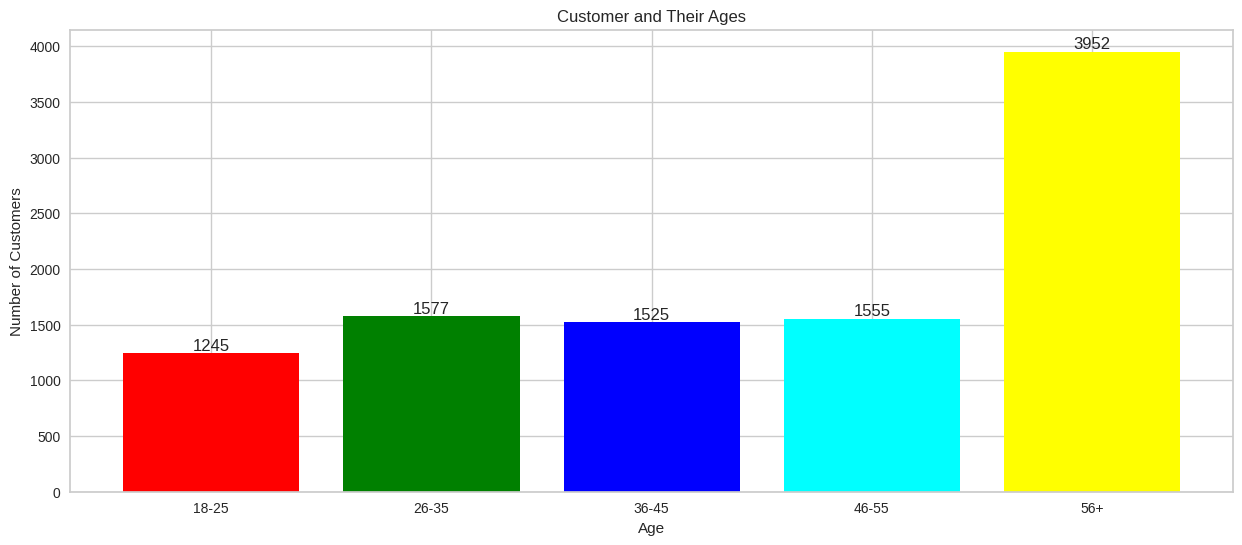

In [581]:
age18_25 = df_cleaned.Age[(df_cleaned.Age >= 18) & (df_cleaned.Age <= 25)]
age26_35 = df_cleaned.Age[(df_cleaned.Age >= 26) & (df_cleaned.Age <= 35)]
age36_45 = df_cleaned.Age[(df_cleaned.Age >= 36) & (df_cleaned.Age <= 45)]
age46_55 = df_cleaned.Age[(df_cleaned.Age >= 46) & (df_cleaned.Age <= 55)]
age55above = df_cleaned.Age[df_cleaned.Age >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "56+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

In [582]:
df_cleaned = df_cleaned.drop(columns=['Name'])

Menghapus kolom yang tidak relevan

In [583]:
label_encoder = LabelEncoder()

categorical_columns = [
    'Marital Status', 'Education Level', 'Smoking Status',
    'Physical Activity Level', 'Employment Status',
    'Alcohol Consumption', 'Dietary Habits',
    'Sleep Patterns', 'History of Mental Illness',
    'History of Substance Abuse', 'Family History of Depression',
    'Chronic Medical Conditions'
]

for column in categorical_columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

Mengubah kolom kategorkal menjadi numeric menggunkan label encode

In [584]:
df_cleaned.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,1,2,2,0,1,26265.67,2,1,0,1,0,1,1
1,55,1,2,1,2,2,0,42710.36,0,2,0,1,0,0,1
2,78,3,3,1,2,2,0,125332.79,1,2,1,0,0,1,0
3,58,0,3,3,2,1,1,9992.78,2,1,2,0,0,0,0
4,18,2,2,0,2,2,1,8595.08,1,1,0,1,0,1,1


In [585]:
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_cleaned)
df_scaled = pd.DataFrame(df_scaled, columns=df_cleaned.columns)
df_scaled.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,0.209677,0.333333,0.25,0.50,1.0,0.0,1.0,0.163163,1.0,0.5,0.0,1.0,0.0,1.0,1.0
1,0.596774,0.333333,0.50,0.25,1.0,1.0,0.0,0.265329,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.967742,1.000000,0.75,0.25,1.0,1.0,0.0,0.778640,0.5,1.0,0.5,0.0,0.0,1.0,0.0
3,0.645161,0.000000,0.75,0.75,1.0,0.5,1.0,0.062064,1.0,0.5,1.0,0.0,0.0,0.0,0.0
4,0.000000,0.666667,0.50,0.00,1.0,1.0,1.0,0.053380,0.5,0.5,0.0,1.0,0.0,1.0,1.0


Melakukan Standarasi/normalisasi dengan MinMaxScaler

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Menggunakan Algoritma Kmeans

In [586]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

labels = kmeans.labels_
kmeans

KMeans(n_clusters=5, random_state=42)

## **b. Evaluasi Model Clustering**

In [587]:
silhouette = silhouette_score(df_scaled, labels)
print("Silhouette Score: ", silhouette)

Silhouette Score:  0.10271363400327511


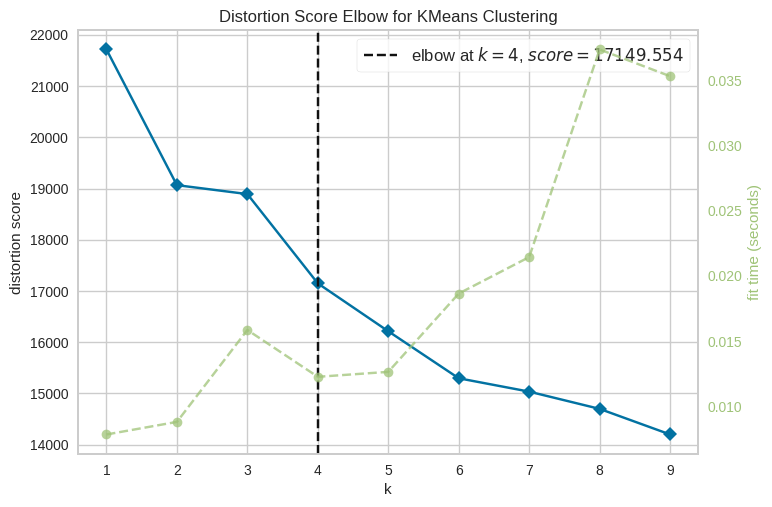

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [588]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_scaled)
visualizer.show()

In [589]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

labels = kmeans.labels_

silhouette = silhouette_score(df_scaled, labels)
print("Silhouette Score: ", silhouette)

Silhouette Score:  0.11227436025311383


In [590]:
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=4)
kmeans.fit(PCA_result)

labels = kmeans.labels_

silhouette_before = silhouette_score(PCA_result, labels)
print("Silhouette Score: ", silhouette_before)

Silhouette Score:  0.48149878961451203


## **c. Feature Selection (Opsional)**

Menggunakan Feature Selection dengan teknik Embedded Methods

In [591]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(df_scaled, labels)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

threshold = 0.05
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

X_important = df_scaled.iloc[:, important_features_indices]

print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    print(f"{df_scaled.columns[i]}: {importances[i]}")

print("\nDimensi data dengan fitur penting:", X_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
Employment Status: 0.21918940971886092
Income: 0.16792851300052294
Chronic Medical Conditions: 0.3719973713605757

Dimensi data dengan fitur penting: (9854, 3)


In [592]:
important_features = df_scaled.columns[important_features_indices]

df_features = df_scaled[important_features]
df_features.head()

,Employment Status,Income,Chronic Medical Conditions
0,1.0,0.163163,1.0
1,0.0,0.265329,1.0
2,0.0,0.778640,0.0
3,1.0,0.062064,0.0
4,1.0,0.053380,1.0


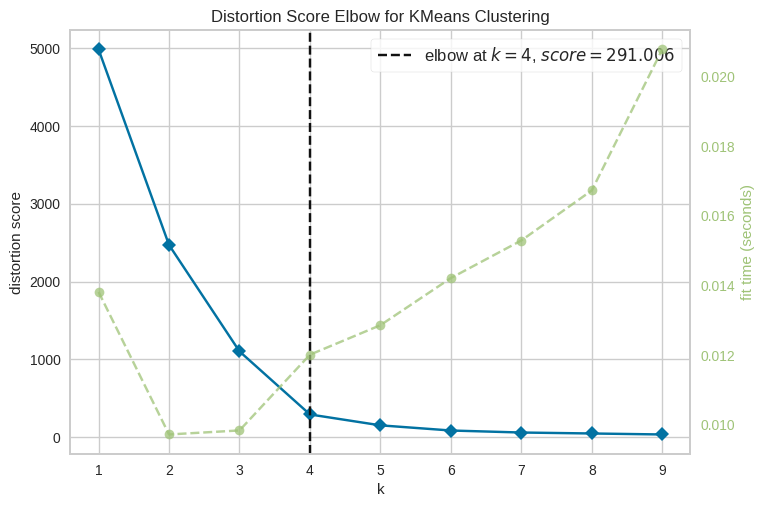

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [593]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_features)
visualizer.show()

In [594]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_features)

labels = kmeans.labels_

silhouette_after = silhouette_score(df_features, labels)
print("Silhouette Score: ", silhouette_after)

Silhouette Score:  0.8316216375393353


In [595]:
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(df_features)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(PCA_result)

labels = kmeans.labels_

silhouette_after = silhouette_score(PCA_result, labels)
print("Silhouette Score: ", silhouette_after)

Silhouette Score:  0.9393128481794822


In [596]:
print("Silhouette Score before Feature Selection: ", silhouette_before)
print("Silhouette Score after Feature Selection: ", silhouette_after)

Silhouette Score before Feature Selection:  0.48149878961451203
Silhouette Score after Feature Selection:  0.9393128481794822


Dari Sebelum dan sesudah melakukan feature selection perbedaan hampir 2 kali lipat sebelum melakukan feature selection. Dengan kondisi ini menandakan bahwa setelah melakukakan feature selection mampu menangani cluster dengan baik.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

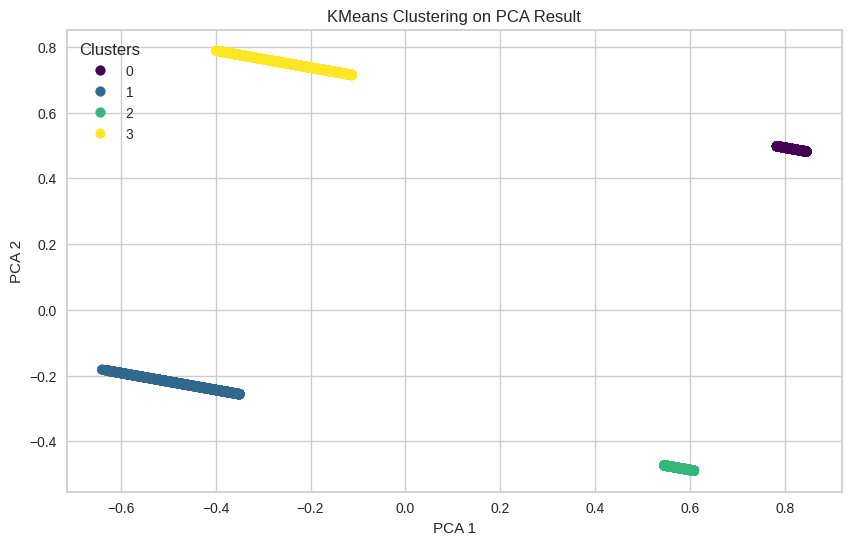

In [597]:
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(df_features)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(PCA_result)

labels = kmeans.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(PCA_result[:, 0], PCA_result[:, 1], c=labels, cmap='viridis', s=50)
plt.title('KMeans Clustering on PCA Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [598]:
df_original = scaler.inverse_transform(df_scaled)
df_original = pd.DataFrame(df_original, columns=df_cleaned.columns)
df_original.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31.0,1.0,1.0,2.0,2.0,0.0,1.0,26265.67,2.0,1.0,0.0,1.0,0.0,1.0,1.0
1,55.0,1.0,2.0,1.0,2.0,2.0,0.0,42710.36,0.0,2.0,0.0,1.0,0.0,0.0,1.0
2,78.0,3.0,3.0,1.0,2.0,2.0,0.0,125332.79,1.0,2.0,1.0,0.0,0.0,1.0,0.0
3,58.0,0.0,3.0,3.0,2.0,1.0,1.0,9992.78,2.0,1.0,2.0,0.0,0.0,0.0,0.0
4,18.0,2.0,2.0,0.0,2.0,2.0,1.0,8595.08,1.0,1.0,0.0,1.0,0.0,1.0,1.0


In [599]:
for column in categorical_columns:
    df_original[column] = label_encoders[column].inverse_transform(df_original[column].astype(int))

df_original.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [600]:
df_original['Cluster'] = kmeans.labels_
df_original.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Cluster
0,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,0
1,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,3
2,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,1
3,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,2
4,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

<ipython-input-601-1c4e621bf101>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Age", data=cluster_age, palette="viridis")


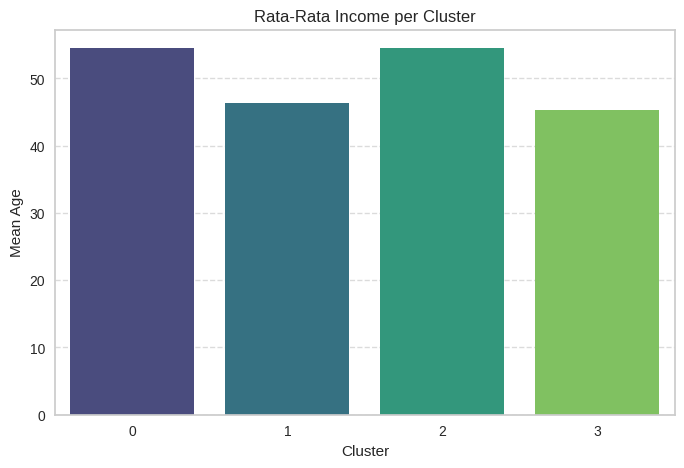

   Cluster        Age
0        0  54.523394
1        1  46.379805
2        2  54.458187
3        3  45.264603


In [601]:
cluster_age = df_original.groupby("Cluster")["Age"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="Cluster", y="Age", data=cluster_age, palette="viridis")
plt.title("Rata-Rata Income per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Age")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(cluster_age)

<ipython-input-602-9afe4af62872>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Income", data=cluster_income, palette="viridis")


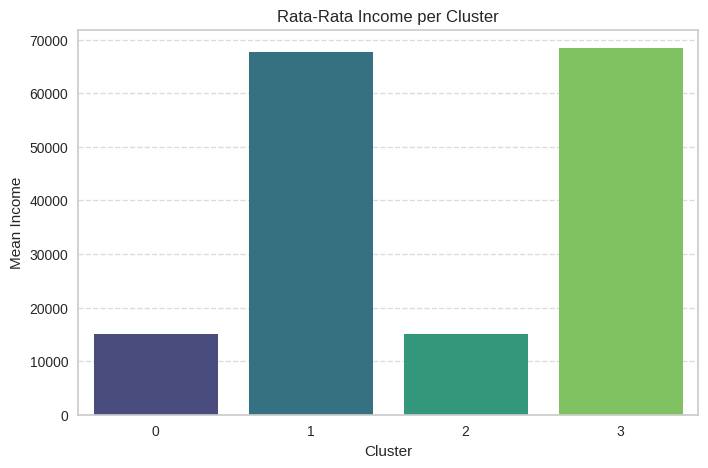

   Cluster        Income
0        0  14996.197780
1        1  67694.074463
2        2  15052.376466
3        3  68421.183040


In [602]:
cluster_income = df_original.groupby("Cluster")["Income"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Cluster", y="Income", data=cluster_income, palette="viridis")
plt.title("Rata-Rata Income per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(cluster_income)

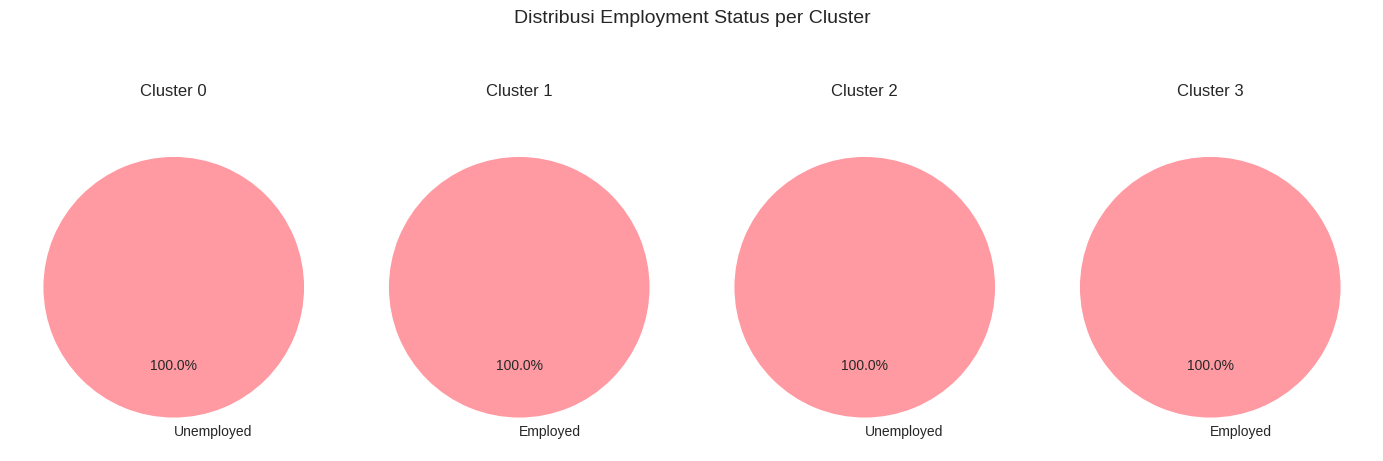

In [603]:
clusters = sorted(df_original['Cluster'].unique())
n_clusters = len(clusters)

n_cols = 4
n_rows = int(np.ceil(n_clusters / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
fig.suptitle('Distribusi Employment Status per Cluster', y=1.02, fontsize=14)

axes = axes.flatten() if n_clusters > 1 else [axes]

colors = ['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB', '#B5EAD7']

for i, cluster in enumerate(clusters):
    cluster_data = df_original[df_original['Cluster'] == cluster]
    counts = cluster_data['Employment Status'].value_counts()

    # Plot pie chart di subplot yang sesuai
    axes[i].pie( counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(counts)], wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 10}
    )
    axes[i].set_title(f'Cluster {cluster}', pad=20)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

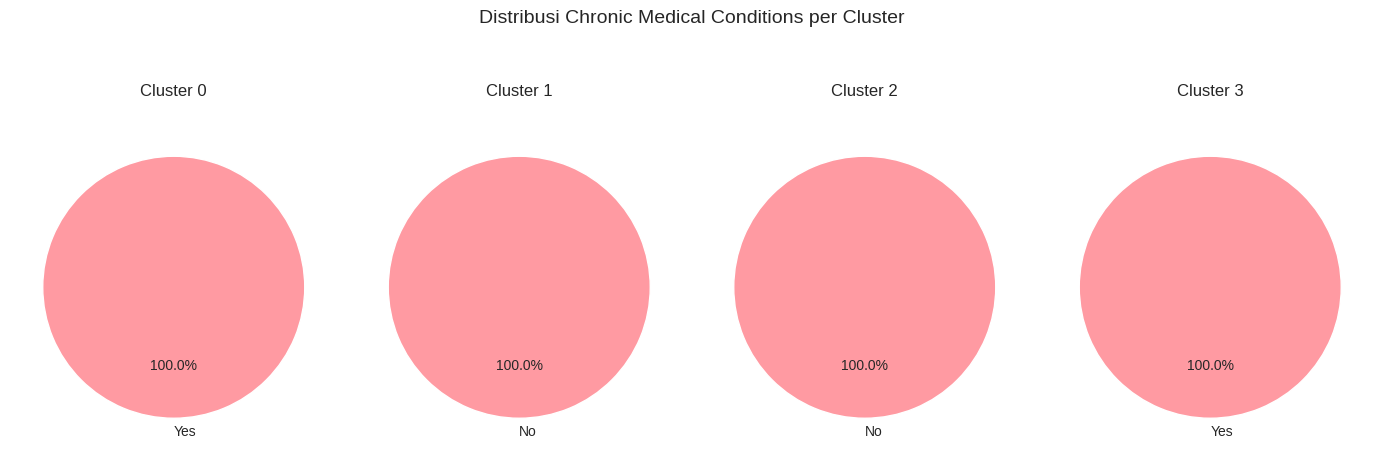

In [604]:
clusters = sorted(df_original['Cluster'].unique())
n_clusters = len(clusters)

n_cols = 4
n_rows = int(np.ceil(n_clusters / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
fig.suptitle('Distribusi Chronic Medical Conditions per Cluster', y=1.02, fontsize=14)

axes = axes.flatten() if n_clusters > 1 else [axes]

colors = ['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB', '#B5EAD7']

for i, cluster in enumerate(clusters):
    cluster_data = df_original[df_original['Cluster'] == cluster]
    counts = cluster_data['Chronic Medical Conditions'].value_counts()

    # Plot pie chart di subplot yang sesuai
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 10}
    )
    axes[i].set_title(f'Cluster {cluster}', pad=20)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Income :** 15000
- **Rata-rata umur:** 55
- **Persentase Jumlah Employment Status :** 100% Unemployed
- **Persentase Jumlah Chronic Medical Conditions :** 100% Yes
- **Analisis:** Cluster ini mencakup Individu yang memiliki penghasilan yang rendah dan sudah berumur lansia. Individu pada cluster ini tidak memiliki pekerjaan dan memiliki Kondisi Medis Kronis. Ini menunjukkan pada cluster ini membutuhkan perhatian khusus karena sangat beresiko tinggi mengalami depresi.

## Cluster 1:
- **Rata-rata Income :** 68000
- **Rata-rata umur:** 46
- **Persentase Jumlah Employment Status :** 100% Employed
- **Persentase Jumlah Chronic Medical Conditions :** 100% No
- **Analisis:** Cluster ini mencakup Individu yang memiliki penghasilan yang tinggi dan masih berumur paruh baya. Individu pada cluster ini memiliki pekerjaan dan tidak memiliki Kondisi Medis Kronis. Ini menandakan bahwa cluster ini termasuk cluster ideal yang beresiko kecil mengalami depresi.

## Cluster 2:
- **Rata-rata Income :** 15000
- **Rata-rata umur:** 55
- **Persentase Jumlah Employment Status :** 100% Unmployed
- **Persentase Jumlah Chronic Medical Conditions :** 100% No
- **Analisis:** Cluster ini mencakup Individu yang memiliki penghasilan yang rendah dan sudah berumur lansia. Individu pada cluster ini tidak memiliki pekerjaan dan tidak memiliki Kondisi Medis Kronis. Pada cluster ini diketahui bahwa kondisinya 50:50, yang mana bisa mengalami depresi karena tidak memiliki pekerjaan, namun kesehatan yang baik juga dapat untuk tidak mengalami depresi.

## Cluster 3:
- **Rata-rata Income :** 69000
- **Rata-rata umur:** 45
- **Persentase Jumlah Employment Status :** 100% Employed
- **Persentase Jumlah Chronic Medical Conditions :** 100% Yes
- **Analisis:** Cluster ini mencakup Individu yang memiliki penghasilan yang tinggi dan masih berumur paruh baya. Individu pada cluster ini memiliki pekerjaan dan memiliki Kondisi Medis Kronis. Pada cluster ini bisa beresiko mengalami depresi, karena umur yang sudah tidak muda, memiliki penyakit kronis, dan masih aktif bekerja bisa mengalami depresi dengan tidak terduga.

**Note :** Untuk Ananlisis tidak semua kolom untuk dilakukan analisisnya,  karena persentase nya hampir sama untuk setiap clusternya

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [605]:
df_original.to_csv('dataset_klasifikasi.csv', index=False)